## Aula 1 - Conhecendo a biblioteca e nossos dados

### Faça como eu fiz
Chegou a hora de você testar os conhecimentos desenvolvidos durante a aula. Para isso, vamos utilizar outro dataset em um desafio que será desenvolvido no decorrer do curso. Esse dataset é uma versão modificada do arquivo Oranges vs. Grapefruit presente no site do Kaggle. Portanto, utilizaremos o arquivo raw disponível no GitHub.

Nessa etapa, você deve efetuar a leitura dos dados. Para isso, importe a NumPy e use a `função loadtxt`. Use o link da url e o parâmetro `usecols` para pular a primeira coluna. É possível usar `np.arange` para criar a sequência de números que representam as colunas. Por fim, também é necessário incluir o parâmetro `skiprows=1` para que a primeira linha de texto seja desconsiderada na leitura do arquivo.

In [22]:
import numpy as np
url = 'https://raw.githubusercontent.com/allanspadini/numpy/dados/citrus.csv'
dado = np.loadtxt(url, delimiter=',',usecols=np.arange(1,6,1),skiprows=1)

## Aula 2 - Exploracao dos dados

### Faça como eu fiz
Chegou a hora de você testar os conhecimentos desenvolvidos durante a aula. Continuando com o projeto das laranjas/toranjas agora você deve selecionar parte dos dados. As colunas que iremos avaliar são as de diâmetro e peso. Crie arrays específicos para guardar o diâmetro e peso da laranja e toranja. O diâmetro está na coluna zero e o peso na coluna 1. Os dados referentes a laranja vão até a linha 4999 e os referentes à toranja iniciam na linha 5000 do arquivo.

Após fazer a seleção de dados, importe a biblioteca matplotlib e crie um gráfico para a laranja e para a toranja do peso pelo diâmetro.

In [23]:
# peso
peso_laranja = dado[:5000,1]
peso_toranja = dado[5000:,1]
# diametro
diametro_laranja = dado[:5000,0]
diametro_toranja = dado[5000:,0]

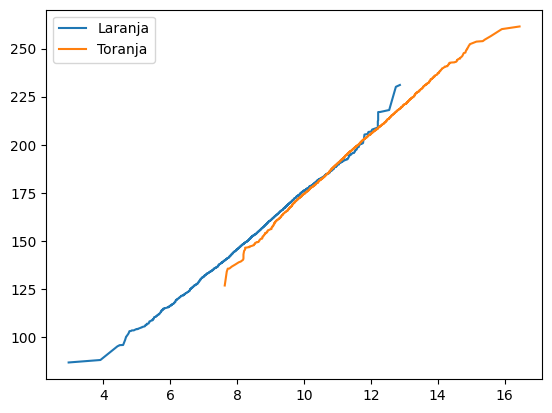

In [ ]:
import matplotlib.pyplot as plt

plt.plot(diametro_laranja, peso_laranja)
plt.plot(diametro_toranja, peso_toranja)
plt.legend(['Laranja', 'Toranja'])


In [25]:
Y = peso_laranja
X = diametro_laranja
n = np.size(X)

a = (n*np.sum(X*Y) - np.sum(X)*np.sum(Y))/(n*np.sum(X**2)-np.sum(X)**2)
b = np.mean(Y) - a*np.mean(X)

In [29]:
print(a)
print(b)


14.7997452319846
27.38560381218413


In [34]:
y = a*X + b

In [26]:
Yt = peso_toranja
Xt = diametro_toranja
n = np.size(X)

at = (n*np.sum(Xt*Yt) - np.sum(Xt)*np.sum(Yt))/(n*np.sum(Xt**2)-np.sum(Xt)**2)
bt = np.mean(Yt) - a*np.mean(Xt)

In [30]:
print(at)
print(bt)

15.70884459360376
27.440787158755285


In [35]:
w = at*Xt + bt

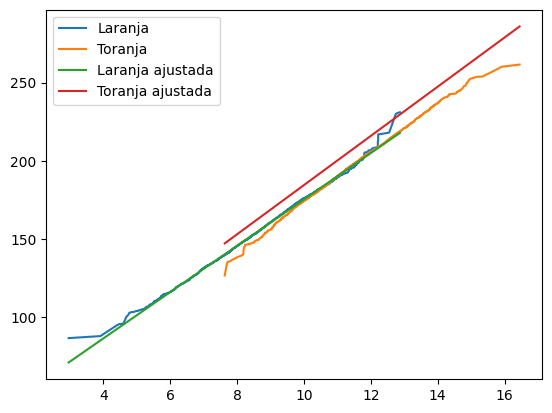

In [37]:
plt.plot(diametro_laranja, peso_laranja)
plt.plot(diametro_toranja, peso_toranja)
plt.plot(X,y)
plt.plot(Xt,w)

plt.legend(['Laranja', 'Toranja', 'Laranja ajustada', 'Toranja ajustada'])